# Seyed Mohammad Amin Atyabi - 830402014 - HW 10

در این تمرین با استفاده از شبکه عصبی مصنوعی اقدام به تشخیص بیماری افراد از روی مشخصه های داده شده میکنیم.

همانطور که در صورت سوال آورده شده است، شبکه عصبی که باید طراحی کنیم بدین شکل است.

<img src="Res/nn-base.png">

همچنین از روابط زیر برای آموزش (بروزرسانی) وزن های شبکه استفاده خواهیم کرد.

<img src="Res/formula.png">

[[ 0.23469998  0.23154611]
 [-0.0156383  -0.01227126]
 [ 0.00257131  0.01001539]
 [ 0.03827852  0.01661864]
 [ 0.01858363  0.03421372]
 [ 0.01674983  0.02601608]
 [ 0.45576871  0.44903864]]
[[0.2938293  0.24892261 0.08606374 0.00291003]
 [0.26040754 0.21413298 0.06397135 0.0163126 ]]
0.7


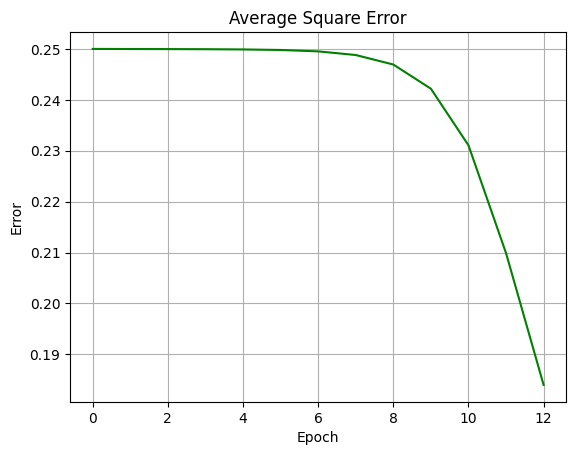

In [1]:
import numpy
import pandas
from scipy import io as sio
from matplotlib import pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder


class NeuralNetwork:
    def __init__(self, x, y, test_x, test_y, learning_rate):
        self.input = x
        self.y = y
        self.test_x = test_x
        self.test_y = test_y
        self.output = numpy.zeros(self.y.shape)
        self.learning_rate = learning_rate
        self.layer1 = None
        self.weights1 = numpy.random.normal(0, 0.01, (self.input.shape[1], 2))
        self.weights2 = numpy.random.normal(0, 0.01, (2, 4))

    def activation_function(self, x):
        return (numpy.exp(2 * x) - 1) / (numpy.exp(2 * x) + 1)

    def activation_function_derivative(self, x):
        return (4 * numpy.exp(2 * x)) / (numpy.exp(2 * x) + 1) ** 2

    def feed_forward(self):
        self.layer1 = self.activation_function(numpy.dot(self.input, self.weights1))
        self.output = self.activation_function(numpy.dot(self.layer1, self.weights2))

    def back_propagate(self):
        d_weights2 = numpy.dot(self.layer1.T, (self.y - self.output) * self.activation_function_derivative(self.output))
        d_weights1 = numpy.dot(self.input.T, numpy.sum(numpy.dot(self.y - self.output, self.weights2.T), axis=1,
                                                       keepdims=True) * self.activation_function_derivative(
            self.layer1))

        self.weights1 += self.learning_rate * d_weights1
        self.weights2 += self.learning_rate * d_weights2

    def calculate_average_square_error(self):
        layer1 = self.activation_function(numpy.dot(self.test_x, self.weights1))
        output = self.activation_function(numpy.dot(layer1, self.weights2))
        return numpy.mean(numpy.square(self.test_y - output))

    def calculate_error(self):
        layer1 = self.activation_function(numpy.dot(self.test_x, self.weights1))
        output = self.activation_function(numpy.dot(layer1, self.weights2))
        return 1 - ((numpy.sum(numpy.argmax(self.test_y, axis=1) == numpy.argmax(output, axis=1))) / len(self.test_x))


columns = [
    'AGE',
    'ON THYROXINE',
    'TSH MEASURED',
    'TSH',
    'T3',
    'TT4 MEASURED',
    'TT4',
    'SICKNESS'
]

data = pandas.DataFrame(sio.loadmat('Data/Thyroid.mat').get('Data'), columns=columns, dtype=float)

normalizer = Normalizer()
X = normalizer.fit_transform(data.drop('SICKNESS', axis=1).values)
y = data['SICKNESS'].values

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

nn = NeuralNetwork(X[0:80], y[0:80], X[80:], y[80:], 0.01)
ase = []

for i in range(1000):
    nn.feed_forward()
    nn.back_propagate()
    ase.append(nn.calculate_average_square_error())
    if ase[-1] < 0.2:
        print(nn.weights1)
        print(nn.weights2)
        print(nn.calculate_error())
        break

plt.plot(ase, color='g')
plt.title('Average Square Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.grid()
plt.show()